In [1]:
import pandas as pd
import numpy as np
from collections import namedtuple
import tensorflow as tf
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import roc_curve, auc, classification_report

sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [2]:
data = pd.read_csv("C:/Users/harsh/OneDrive/Documents/Machine Learning Dataset/amazon food review/Reviews.csv")

In [3]:
print("Number of reviews:",len(data))

Number of reviews: 568454


In [4]:
data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


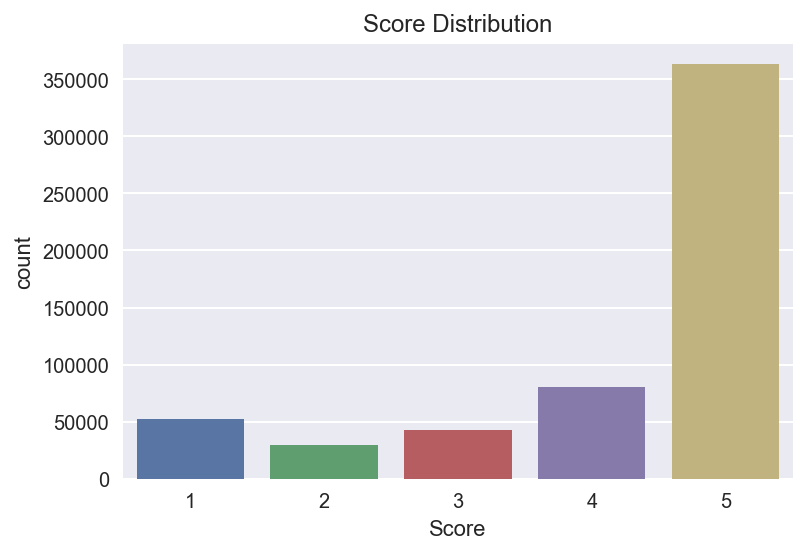

In [5]:
ax = plt.axes()
sns.countplot(data.Score,ax=ax)
ax.set_title('Score Distribution')
plt.show()

In [46]:
print("Score 1 " ,len(data.loc[data.Score == 1]))
print("Score 2 ", len(data.loc[data.Score == 2]))
print("Score 3 ",len(data.loc[data.Score == 3]))
print("Score 4 " ,len(data.loc[data.Score == 4]))
print("Score 5 " ,len(data.loc[data.Score == 5]))

Score 1  52268
Score 2  29769
Score 3  42640
Score 4  80655
Score 5  363122


In [47]:
print("Average Score: ",np.mean(data.Score))
print("Median Score: ",np.median(data.Score))

Average Score:  4.183198640523243
Median Score:  5.0


In [48]:
data.loc[data.Score>3,'Sentiment']="POSITIVE"
data.loc[data.Score<=3,'Sentiment']="NEGATIVE"

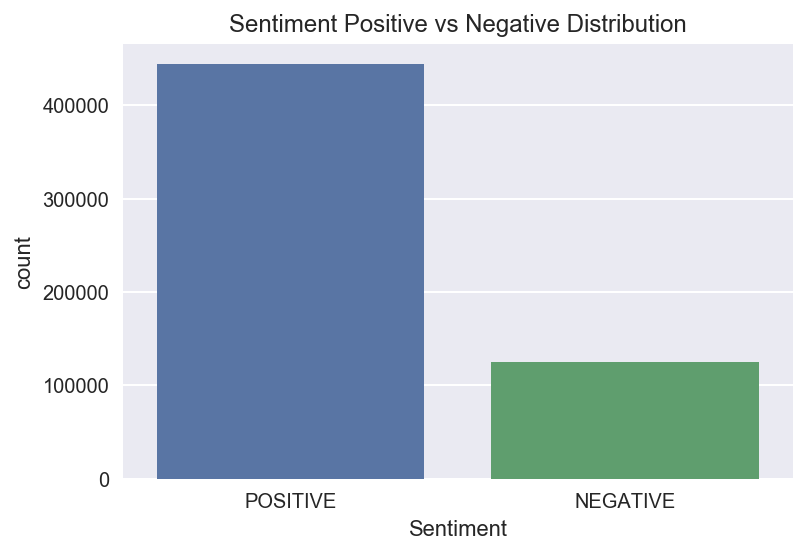

In [49]:
ax = plt.axes()
sns.countplot(data.Sentiment,ax=ax)
ax.set_title('Sentiment Positive vs Negative Distribution')
plt.show()

In [50]:
print("Proportion of positive review:", len(data[data.Sentiment=="POSITIVE"])/len(data))
print("Proportion of negative review:",len(data[data.Sentiment=="NEGATIVE"])/len(data))

Proportion of positive review: 0.7806735461444549
Proportion of negative review: 0.21932645385554503


In [51]:
reviews = data.Text.values
labels = data.Sentiment.values

In [52]:
def pretty_print_review_and_label(i):
    if data.Sentiment[i]=="POSITIVE":
        print("POSITIVE" + "\t" + reviews[i][:90] + "...")
    else:
        print("NEGATIVE" + "\t " + reviews[i][:90] + "...")

In [56]:
pretty_print_review_and_label(1)
pretty_print_review_and_label(4)
pretty_print_review_and_label(30)
pretty_print_review_and_label(150)
pretty_print_review_and_label(250)
pretty_print_review_and_label(650)
pretty_print_review_and_label(5220)
pretty_print_review_and_label(12781)
pretty_print_review_and_label(14500)
pretty_print_review_and_label(17800)
pretty_print_review_and_label(19100)

NEGATIVE	 Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized un...
POSITIVE	Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was v...
POSITIVE	I have never been a huge coffee fan. However, my mother purchased this little machine and ...
POSITIVE	This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on...
POSITIVE	WOW!  This product is very impressive. I bought the 8oz blueberry and was pleased with pac...
POSITIVE	We make up a coffee creamer with 1/4 part commercial coffee creamer, vanilla, butter creme...
POSITIVE	I found these tubs at Costco and was dismayed to discover that they are no longer carrying...
POSITIVE	I have tasted many hot sauces, but for me, this is perfect. It starts bright in flavor, th...
POSITIVE	I have had mystery stomach issues since my early teens (I'm 43). Nothing has helped.  Then...
NEGATIVE	 This product have no flavor at all, I could not taste apple or

In [57]:
positive_reviews = [reviews[i] for i in range(len(reviews)) if labels[i]=="POSITIVE"]
negative_reviews = [reviews[i] for i in range(len(reviews)) if labels[i]=="NEGATIVE"]

In [58]:

from collections import Counter

cnt_positve = Counter()

for row in positive_reviews:
    cnt_positve.update(row.split(" "))
print("Vocabulary size for positve reviews:", len(cnt_positve.keys()))

cnt_negative = Counter()

for row in negative_reviews:
    cnt_negative.update(row.split(" "))
print("Vocabulary size for negative reviews:", len(cnt_negative.keys()))

cnt_total = Counter()

for row in reviews:
    cnt_total.update(row.split(" "))

Vocabulary size for positve reviews: 480349
Vocabulary size for negative reviews: 239355


In [59]:
pos_neg_ratio = Counter()
vocab_pos_neg = (set(cnt_positve.keys())).intersection(set(cnt_negative.keys()))
for word in vocab_pos_neg:
    if cnt_total[word]>100:
        ratio = cnt_positve[word]/float(cnt_negative[word]+1)
        if ratio>1:
            pos_neg_ratio[word] = np.log(ratio)
        else:
            pos_neg_ratio[word] = -np.log(1/(ratio+0.01))

In [60]:
pos_neg_ratio .most_common()[:30]

[('/>Highly', 5.791488055075306),
 ('anytime.', 5.147494476813453),
 ('soothing.', 4.912654885736052),
 ('addictive!', 4.897839799950911),
 ('Enjoy.', 4.840242308167575),
 ('/>Magnesium', 4.721470641684252),
 ('/>Almonds', 4.709530201312334),
 ('versatile.', 4.6443908991413725),
 ('Rich,', 4.634728988229636),
 ('organs.', 4.532599493153256),
 ('hooked.', 4.516338972281476),
 ('Delicious!', 4.496630017412885),
 ('diet?', 4.448516375942715),
 ('/>1st', 4.442651256490317),
 ('Cakesters', 4.382026634673881),
 ('Booda', 4.377851263263401),
 ('far!', 4.3694478524670215),
 ('*****<br', 4.3652195163575005),
 ('Sciences', 4.33729074083249),
 ('Favorites"', 4.33729074083249),
 ('synthesis.', 4.33729074083249),
 ('Highly', 4.3313052590894525),
 ('Chili<br', 4.31748811353631),
 ('addicted!', 4.310799125385514),
 ('favorites!', 4.30406509320417),
 ('plus!', 4.30406509320417),
 ('Delicious.', 4.298645025734831),
 ('Yummy!', 4.295015257684252),
 ('disappoint!', 4.283586561860629),
 ('recommended!', 4

C:\Users\harsh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


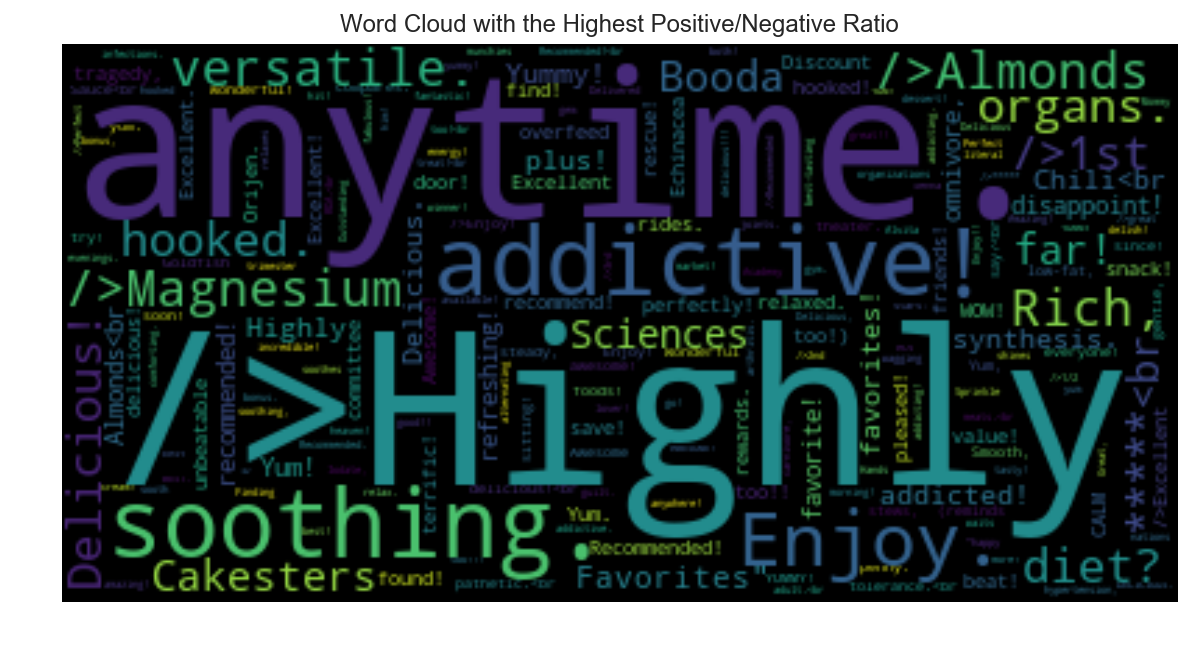

In [61]:
positive_dict = {}
for word, cnt in pos_neg_ratio.items():
    if (cnt>1):
        positive_dict[word] = cnt

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=positive_dict)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
ax = plt.axes()
ax.set_title('Word Cloud with the Highest Positive/Negative Ratio')
plt.show()

In [18]:
list(reversed(pos_neg_ratio.most_common()))[0:30]

[('FREAKS', -4.203010866014426),
 ('factory)', -4.201364829298291),
 ('judgment,', -4.201364829298291),
 ('mistakes.<br', -3.914513666740598),
 ('howling,', -3.912023005428146),
 ('NO<br', -3.328075116833193),
 ('sad.<br', -3.248146207168314),
 ('Lives,', -3.2188758248682006),
 ('Reducing', -3.2188758248682006),
 ('slaughterhouse', -3.1778728512505374),
 ('ANYMORE.', -3.1424854222041994),
 ('(good,', -3.1088233633266724),
 ('mischief.', -3.101092789211817),
 ('blue)', -2.9045009573244873),
 ('disappointment!', -2.8650573056222033),
 ('crying,', -2.7623992656292384),
 ('5/8', -2.745951587905034),
 ('"healthy,"', -2.7375866155346618),
 ('trashing', -2.6486357670125487),
 ('deliberately', -2.5174652359649476),
 ('returnable', -2.489919191611545),
 ('disorder.', -2.4825564724430467),
 ('Halo,', -2.4427317247372873),
 ('deceptive', -2.407945608651872),
 ('Horrible', -2.399007001651061),
 ('Buyer', -2.3765230838453015),
 ('twenty-five', -2.342112073137968),
 ('horrible!', -2.2335922215070942

C:\Users\harsh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


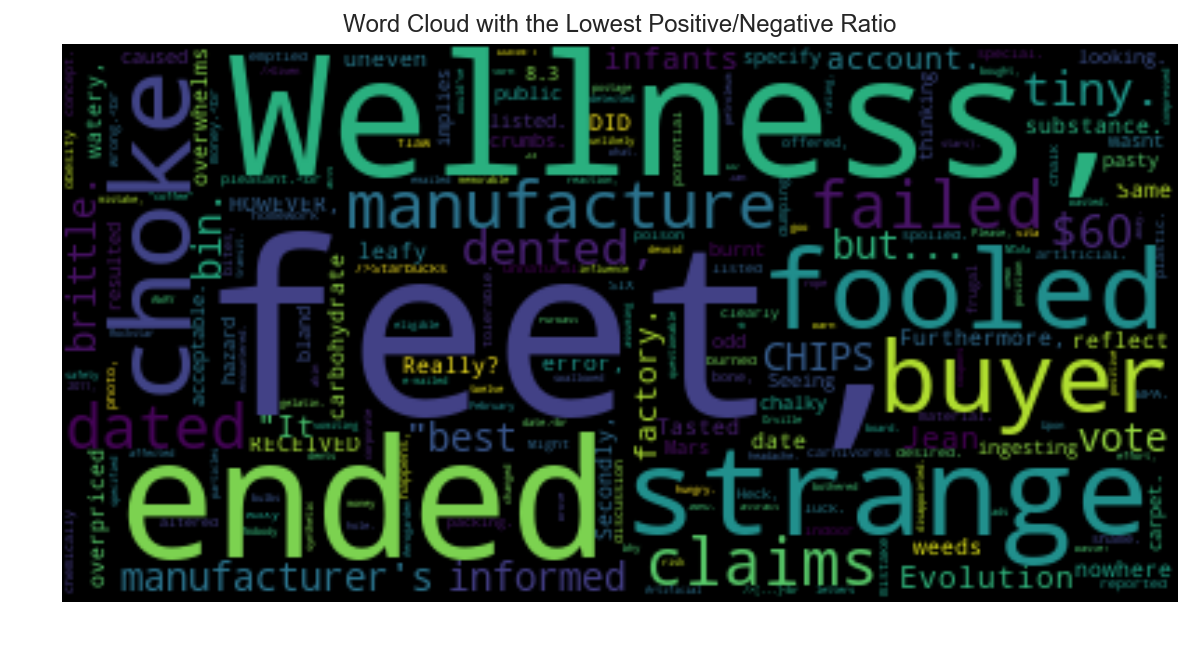

In [19]:
negative_dict = {}
for word, cnt in pos_neg_ratio.items():
    if (cnt<1) & (cnt>0):
        negative_dict[word] = -np.log(cnt)

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=negative_dict)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
ax = plt.axes()
ax.set_title('Word Cloud with the Lowest Positive/Negative Ratio')
plt.show()

### Data Preprocessing

In [20]:
reviews = data.Text.values
labels = np.array([1 if s=="POSITIVE" else 0 for s in data.Sentiment.values])

In [21]:
reviews_cleaned = []
for i in range(len(reviews)):
    reviews_cleaned.append(''.join([c.lower() for c in reviews[i] if c not in punctuation]))

In [22]:
print("Before: ",reviews[0])
print("")
print("After: ",reviews_cleaned[0])

Before:  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

After:  i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most


In [23]:
vocabulary = set(' '.join(reviews_cleaned).split())
print("Vocabulary size: ", len(vocabulary))

Vocabulary size:  240772


In [24]:
def vocabulary_reduction(reviews,min_freq=10,polarity_cut_off=0.1):
    
    pos_count = Counter()
    neg_count = Counter()
    tot_count = Counter()

    for i in range(len(reviews)):
        for word in reviews[i].split():
            tot_count[word]+=1
            if labels[i] == 1:
                pos_count[word]+=1
            else:
                neg_count[word]+=1    
    
    #Identify words with frequency greater than min_freq
    vocab_freq = []
    for word in tot_count.keys():
        if tot_count[word]>min_freq:
            vocab_freq.append(word)  
    
    #Use polarity to reduce vocab
    pos_neg_ratio = Counter()
    vocab_pos_neg = (set(pos_count.keys())).intersection(set(neg_count.keys()))
    for word in vocab_pos_neg:
        if tot_count[word]>100:
            ratio = pos_count[word]/float(neg_count[word]+1)
            if ratio>1:
                pos_neg_ratio[word] = np.log(ratio)
            else:
                pos_neg_ratio[word] = -np.log(1/(ratio+0.01)) 
    
    mean_ratio = np.mean(list(pos_neg_ratio.values()))
    
    vocab_polarity = []
    for word in pos_neg_ratio.keys():
        if (pos_neg_ratio[word]<(mean_ratio-polarity_cut_off)) or (pos_neg_ratio[word]>(mean_ratio+polarity_cut_off)):
            vocab_polarity.append(word)
     
    vocab_rm_polarity = set(pos_neg_ratio.keys()).difference(vocab_polarity)
    vocab_reduced = (set(vocab_freq)).difference(set(vocab_rm_polarity))
 
    reviews_cleaned = []
    
    for review in reviews:
        review_temp = [word for word in review.split() if word in vocab_reduced]
        reviews_cleaned.append(' '.join(review_temp))
    
    return reviews_cleaned

In [25]:
reviews_cleaned = vocabulary_reduction(reviews_cleaned,min_freq=0,polarity_cut_off=0)

In [26]:
text = ' '.join(reviews_cleaned)
vocabulary = set(text.split(' '))
vocabulary_to_int = {word:i for i,word in enumerate(vocabulary,0)}

In [27]:
def reviews_to_integers(reviews):
    reviews_to_int = []
    for i in range(len(reviews)):
        to_int = [vocabulary_to_int[word] for word in reviews[i].split()]
        reviews_to_int.append(to_int)
    return reviews_to_int

reviews_to_int = reviews_to_integers(reviews_cleaned)

In [28]:
review_lengths = [len(review) for review in reviews_to_int]
print("Shortest review:", min(review_lengths))
print("Longest revies:",max(review_lengths))

Shortest review: 3
Longest revies: 3414


C:\Users\harsh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\harsh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

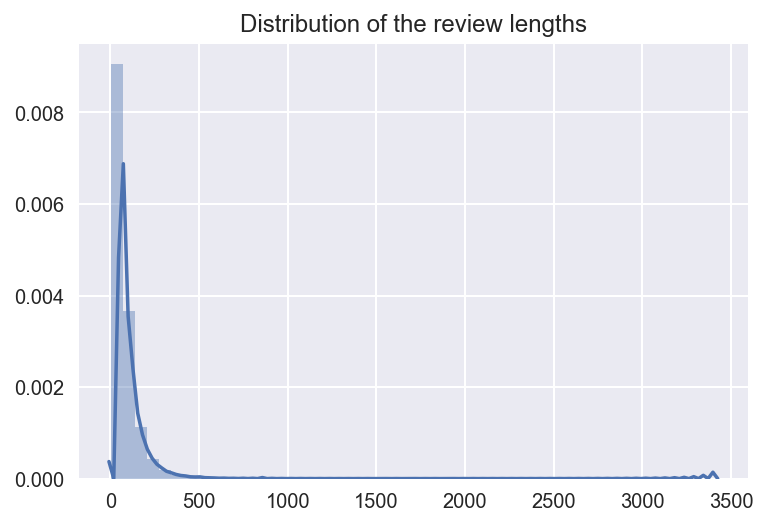

In [ ]:
ax = plt.axes()
sns.distplot(review_lengths)
ax.set_title("Distribution of the review lengths")
plt.plot()

In [ ]:
pd.DataFrame(review_lengths).describe()

In [ ]:
max_length = 200
features = np.zeros(shape=(len(reviews_to_int),max_length),dtype=int)

In [ ]:
for i in range(len(reviews_to_int)):
    nb_words = len(reviews_to_int[i])
    features[i] = [0]*(max_length -nb_words) + reviews_to_int[i][:200]

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5435)

splitter = sss.split(features, labels)
train_index, validation_index = next(splitter)
test_index = validation_index[:int(len(validation_index)/2)]
validation_index = validation_index[int(len(validation_index)/2):]

train_x, train_y = features[train_index], labels[train_index]
val_x, val_y = features[test_index], labels[test_index]
test_x, test_y = features[validation_index], labels[validation_index]

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

### Build the LSTM model with Tensorflow

In [ ]:
lstm_size = 256
lstm_layers = 1
batch_size = 500
learning_rate = 0.001
embed_size = 200

In [ ]:
def build_rnn(vocabulary_to_int,
              embed_size=embed_size,
              batch_size=batch_size,
              learning_rate=learning_rate,
              lstm_size=lstm_size,
              lstm_layers=lstm_layers):
    
    tf.reset_default_graph()
    
    n_words = len(vocabulary_to_int)
    
    with tf.name_scope('inputs'):
        inputs_ = tf.placeholder(tf.int32,[None, None],name='inputs_')
    with tf.name_scope('labels'):
        labels_ = tf.placeholder(tf.int32,[None, None],name='labels_')
    with tf.name_scope('keep_prob'):    
        keep_prob = tf.placeholder(tf.float32,name='keep_prob')
        
    with tf.name_scope('embedding'):
        embedding = tf.Variable(tf.random_normal((n_words,embed_size),-1,1),name='embedding_')
        embed = tf.nn.embedding_lookup(embedding,inputs_)
        
    with tf.name_scope("RNN_cells"):
        lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)

        # Add dropout to the cell
        drop = tf.contrib.rnn.DropoutWrapper(lstm,output_keep_prob=keep_prob)

        # Stack up multiple LSTM layers, for deep learning
        cell = tf.contrib.rnn.MultiRNNCell([drop]*lstm_layers)
        
        with tf.name_scope("RNN_init_state"):
            # Getting an initial state of all zeros
            initial_state = cell.zero_state(batch_size, tf.float32)
    
    with tf.name_scope("RNN_forward"):
        outputs, final_state = tf.nn.dynamic_rnn(cell, embed, initial_state=initial_state)
        
    with tf.name_scope('predictions'):
        predictions = tf.contrib.layers.fully_connected(outputs[:, -1], 1, 
                                                        activation_fn=tf.sigmoid,
                                                        weights_initializer=
                                                        tf.truncated_normal_initializer(stddev=0.1))   
    with tf.name_scope('cost'):
        cost = tf.losses.mean_squared_error(labels_, predictions)
        tf.summary.scalar('cost', cost)
    
    with tf.name_scope('train'):
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    with tf.name_scope('accuracy'):
        correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), labels_)
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    merged = tf.summary.merge_all()
    
    # Export the nodes 
    export_nodes = ['inputs_', 'labels_','initial_state', 'final_state',
                    'keep_prob', 'cell', 'cost', 'predictions', 'optimizer',
                    'accuracy','merged']
    
    Graph = namedtuple('Graph', export_nodes)
    
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])
    
    return graph

In [ ]:
graph = build_rnn(vocabulary_to_int,
              embed_size=embed_size,
              batch_size=batch_size,
              learning_rate=learning_rate,
              lstm_size=lstm_size,
              lstm_layers=lstm_layers)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    file_writer = tf.summary.FileWriter('output/logs/1', sess.graph)

In [ ]:
def get_batches(x, y, batch_size=100):
    
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

In [ ]:
epochs = 5

def train(model, epoch,train_writer,test_writer):
    
    saver = tf.train.Saver()

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
    
        iteration = 1
        for e in range(epochs):
            state = sess.run(model.initial_state)

            for ii, (x, y) in enumerate(get_batches(train_x, train_y, batch_size), 1):
                feed = {model.inputs_: x,
                        model.labels_: y[:, None],
                        model.keep_prob: 0.5,
                        model.initial_state: state}
                summary,loss, state, _ = sess.run([model.merged,model.cost, 
                                                   model.final_state, 
                                                   model.optimizer], feed_dict=feed)

                if iteration%5==0:
                    print("Epoch: {}/{}".format(e, epochs),
                          "Iteration: {}".format(iteration),
                          "Train loss: {:.3f}".format(loss))

                train_writer.add_summary(summary, iteration)

                if iteration%25==0:
                    val_acc = []
                    val_state = sess.run(model.cell.zero_state(batch_size, tf.float32))
                    for x, y in get_batches(val_x, val_y, batch_size):
                        feed = {model.inputs_: x,
                                model.labels_: y[:, None],
                                model.keep_prob: 1,
                                model.initial_state: val_state}
                        summary, batch_acc, val_state = sess.run([model.merged,model.accuracy, 
                                                         model.final_state], feed_dict=feed)
                        val_acc.append(batch_acc)

                    test_writer.add_summary(summary,iteration)
                    print("Val acc: {:.3f}".format(np.mean(val_acc)))

                iteration +=1
        saver.save(sess, "output/checkpoints/sentiment.ckpt")

In [ ]:
lstm_size_options = [256]
lstm_layers_options = [1]
learning_rate_options = [0.001]

#lstm_size_options = [128,256,512]
#lstm_layers_options = [1, 2]
#learning_rate_options = [0.002, 0.001]


In [ ]:
for lstm_size in lstm_size_options:
    for lstm_layers in lstm_layers_options:
        for learning_rate in learning_rate_options:
            log_string_train = 'output/logs/2/train/lr={},rl={},ru={}'.format(learning_rate, lstm_layers, lstm_size)
            log_string_test = 'output/logs/2/test/lr={},rl={},ru={}'.format(learning_rate, lstm_layers, lstm_size)
            train_writer = tf.summary.FileWriter(log_string_train)
            test_writer = tf.summary.FileWriter(log_string_test)
            
            print("lstm size: {}".format(lstm_size),
                    "nb layers : {}".format(lstm_layers),
                    "learn rate : {:.3f}".format(learning_rate))
            
            model = build_rnn(vocabulary_to_int,
                      embed_size=embed_size,
                      batch_size=batch_size,
                      learning_rate=learning_rate,
                      lstm_size=lstm_size,
                      lstm_layers=lstm_layers)

            train(model, epochs, train_writer,test_writer)

In [ ]:
tf.train.get_checkpoint_state('output/checkpoints')

In [ ]:
test_acc = []
test_pred = []
test_label = []
    
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, "output/checkpoints/sentiment.ckpt")
    test_state = sess.run(model.cell.zero_state(batch_size, tf.float32))
    
    for ii, (x, y) in enumerate(get_batches(test_x, test_y, batch_size), 1):
        feed = {model.inputs_: x,
                model.labels_: y[:, None],
                model.keep_prob: 1,
                model.initial_state: test_state}
        batch_pred, batch_acc, test_state = sess.run([model.predictions,model.accuracy, model.final_state], feed_dict=feed)
        test_acc.append(batch_acc)
        test_pred = np.append(test_pred,batch_pred)
        test_label = np.append(test_label,y)
    print("Test accuracy: {:.3f}".format(np.mean(test_acc)))

In [ ]:
print("Test acc " , test_acc)
print("Test pred " , test_pred)
print("Test label " , test_label)

In [ ]:
fpr, tpr, _ = roc_curve(test_label, test_pred)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr, label='AUC %0.2f'%(roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.title("Receiver Operating Characteristics Curve")
plt.show()

In [ ]:
print(classification_report(test_label, list(map(lambda x: round(x), test_pred))))